## Importing the necessary libraries

In [1]:
# to work with dataframes
import pandas as pd               

# to work with numerical operations
import numpy as np                

# to visualize data
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns     

# to partition the data
from sklearn.model_selection import train_test_split  

# Importing Library for Logistic regression
from sklearn.linear_model import LogisticRegression   

# Importing performance metrices- accuracy score & confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix   

# Importing warnings to ignore warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data_income = pd.read_csv('income.csv')
data_income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [5]:
#Creating a copy of original data
data = data_income.copy()

### Exploratory data analysis:

In [6]:
#1. Getting to know data
#2. Data preprocessing (Missing Values)
#3. Cross tables and data visualizations

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [8]:
# Check for missing values
data.isnull()
print('Data columns with null values:\n',data.isnull().sum())

# Therefore no missing values in the dataframe!

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [9]:
# Summary for numerical variables
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
# Summary for categorical variables
summary_cate = data.describe(include = 'O')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [11]:
#Frequencies of each category
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [12]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
# Checking for unique classes of variables

print(np.unique(data['JobType']))
print(np.unique(data['occupation']))


[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [14]:
# assigning ? as nan 
data = pd.read_csv('income.csv',na_values=[" ?"])

### Data Preprocessing

In [15]:
#To check for misssing values
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [16]:
data.shape

(31978, 13)

In [17]:
#subset the rows where atleast one column is missing
missing = data[data.isnull().any(axis=1)]

In [18]:
#Points to be noted:
#1. Missing values in Jobtype = 1809
#2. Missing values in occupation = 1816
#3. There are 1809 rows where two specific columns i.e. occupation & Jobtype have missing values
#4. (1816-1809) = 7 => We still have occupation unfilled for these & rows.
#Because the jobType is Never-worked

In [19]:
# dropping the rows with missing values
data2 = data.dropna(axis=0)

In [20]:
data2.shape

(30162, 13)

In [21]:
# Relationship between the independent variables (numeric)
# here since we can see the variables are not correlated to each other or are weakly correlated
correlation = data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


### Cross tables & Data visualizations

In [22]:
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [23]:
# Gender Proportion table:
# give variable of interest in the index column
gender = pd.crosstab(index = data2["gender"],
                    columns = "count",
                    normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [24]:
# Gender vs salary status
# Two way table
# From the table it is clear that only 11% women earn more than 50000$
# men are more likely to earn more than 50000$
gender_salstat = pd.crosstab(index = data2["gender"],
                           columns = data2['SalStat'],
                           margins = True,
                           normalize ='index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


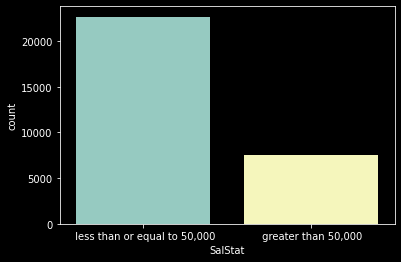

In [27]:
SalStat = sns.countplot(data2['SalStat'])

<AxesSubplot:xlabel='age'>

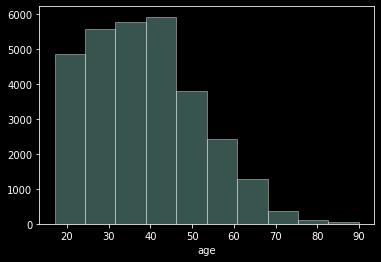

In [28]:
# Histogram of Age
#People with age 20-45 are high in frequency
sns.distplot(data2['age'],bins = 10, kde = False,hist_kws=dict(edgecolor="white", linewidth=1))

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

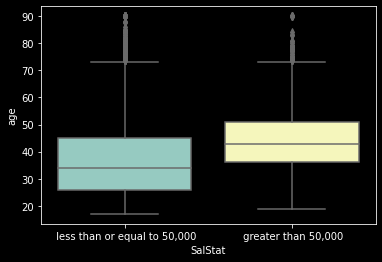

In [29]:
# Box Plot - Age Vs salary Status 
# Bivariate analysis
# people with age 35-50 are likely to earn > 50,000
# people with age 25-35 are more likely to earn <= 50,000

sns.boxplot('SalStat','age',data = data2)
data2.groupby('SalStat')['age'].median()

<AxesSubplot:xlabel='count', ylabel='JobType'>

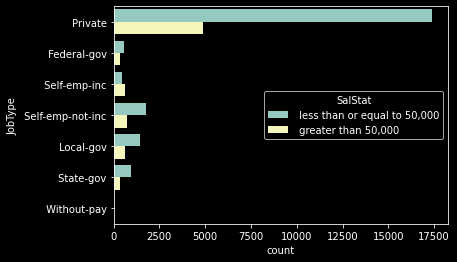

In [30]:
# JobType vs salary status
sns.countplot(y="JobType",data=data2,hue='SalStat')

In [31]:
# JobType vs salary status
# Two way table
JobType_salstat = pd.crosstab(index = data2["JobType"],
                           columns = data2['SalStat'],
                           margins = True,
                           normalize ='index')
print(JobType_salstat)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.248922                       0.751078


<AxesSubplot:xlabel='count', ylabel='EdType'>

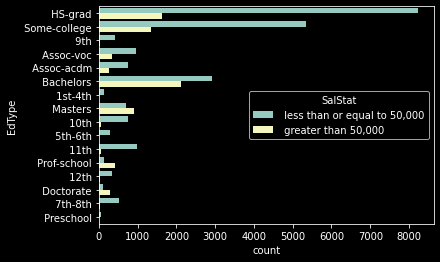

In [32]:
# Education vs salary status
sns.countplot(y="EdType",data=data2,hue='SalStat')

In [33]:
# EdType vs salary status
# Two way table
EdType_salstat = pd.crosstab(index = data2["EdType"],
                           columns = data2['SalStat'],
                           margins = True,
                           normalize ='index')
print(EdType_salstat)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

<AxesSubplot:xlabel='count', ylabel='occupation'>

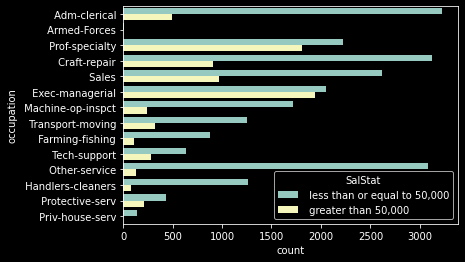

In [34]:
# Occupation vs salary status
sns.countplot(y="occupation",data=data2,hue='SalStat')

In [35]:
# occupation vs salary status
# Two way table
Occupation_salstat = pd.crosstab(index = data2["occupation"],
                           columns = data2['SalStat'],
                           margins = True,
                           normalize ='index')
print(Occupation_salstat)

# Those who make > 50000 USD per year are more likely to work as managers 
# and professionals hence an important variable in avoiding the misuse of susidies

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

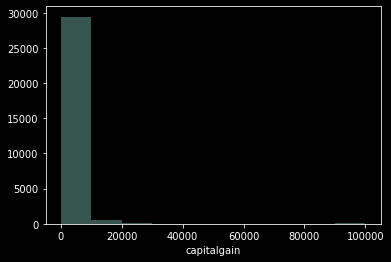

In [36]:
# 92% (27611) of the capital gain is 0
Capital_gain = sns.distplot(data2['capitalgain'],bins=10,kde=False)

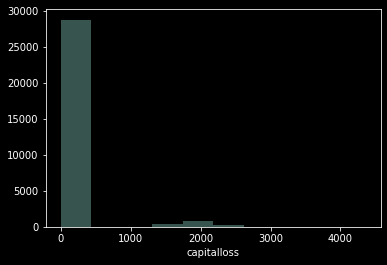

In [37]:
# 95% (28721) of the capital loss is 0
Capital_loss = sns.distplot(data2['capitalloss'],bins=10,kde=False)

SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

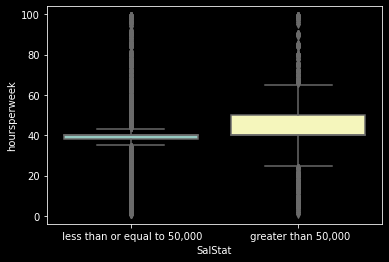

In [38]:
# Hours per week vs. Salary status
sns.boxplot('SalStat','hoursperweek',data = data2)
data2.groupby('SalStat')['hoursperweek'].median()


# From the plot it is clear that those who make more than 50000USD per year are likely 
# to spend 40-50 hours per week.
# Hence it can ccontribute in classifying the individuals salary status since there is association
# between salary status and hours per week

### Building the model ###

In [39]:
data2['SalStat']

0         less than or equal to 50,000
1         less than or equal to 50,000
2                  greater than 50,000
3         less than or equal to 50,000
4         less than or equal to 50,000
                     ...              
31973     less than or equal to 50,000
31974     less than or equal to 50,000
31975     less than or equal to 50,000
31976     less than or equal to 50,000
31977     less than or equal to 50,000
Name: SalStat, Length: 30162, dtype: object

In [40]:
# Reindexing the salary status names to 0,1
# Since Ml models cannot work with categorical data directly
# Integer encoding
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [41]:
# creating dummy variables
new_data = pd.get_dummies(data2,drop_first = True)

In [42]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
# Storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [44]:
# Separating the input names from data
# We have only independent variables
features = list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ Doctorate', 'nativecountry_ Yugoslavia', 'EdType_ Assoc-acdm', 'nativecountry_ Hong', 'nativecountry_ Laos', 'nativecountry_ Dominican-Republic', 'maritalstatus_ Separated', 'nativecountry_ Hungary', 'EdType_ 7th-8th', 'nativecountry_ Guatemala', 'nativecountry_ Canada', 'EdType_ 12th', 'JobType_ Self-emp-not-inc', 'nativecountry_ Thailand', 'JobType_ Private', 'occupation_ Farming-fishing', 'JobType_ State-gov', 'nativecountry_ Haiti', 'relationship_ Other-relative', 'EdType_ Preschool', 'occupation_ Priv-house-serv', 'nativecountry_ France', 'nativecountry_ Poland', 'occupation_ Machine-op-inspct', 'race_ Other', 'nativecountry_ Honduras', 'occupation_ Protective-serv', 'nativecountry_ Trinadad&Tobago', 'capitalloss', 'maritalstatus_ Married-AF-spouse', 'relationship_ Unmarried', 'JobType_ Self-emp-inc', 'maritalstatus_ Married-civ-spouse', 'capitalgain', 'maritalstatus_ Married-spouse-absent', 'JobType_ Local-gov', 'occupation_ Armed-Forces', 'EdType_ 5th-6th', 'age', 'mar

In [45]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [46]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [47]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [48]:
# Make an instance of the Model
logistic = LogisticRegression()

In [49]:
# Fitting the modelon the train set using fit function
# fitting the values for x and y
logistic.fit(train_x,train_y)

LogisticRegression()

In [50]:
# Coefficients of the model instance
logistic.coef_

array([[ 2.48300024e-01, -5.20239660e-04, -5.96227934e-02,
        -1.26148346e-03, -6.14526576e-03, -2.56898105e-02,
        -1.79314812e-01, -3.27076926e-03, -2.49937720e-01,
        -2.17461396e-02,  3.59471195e-03, -9.57574883e-02,
        -5.82586495e-01, -3.33551392e-03, -3.26074417e-01,
        -3.89941436e-01, -1.26701051e-01, -1.18224696e-02,
        -2.44404240e-01, -2.63481510e-02, -4.06179256e-02,
         5.70758396e-03, -9.34303242e-03, -3.50454319e-01,
        -8.39368498e-02, -2.24429796e-03, -1.41985251e-02,
        -4.48790261e-03,  6.70549419e-04,  1.64947912e-02,
        -5.75379780e-01,  1.61534105e-01,  1.13309591e+00,
         3.16834885e-04, -5.83533121e-02, -2.47879477e-01,
        -1.93890060e-03, -1.40222328e-01,  4.50606505e-04,
        -9.74487324e-02, -3.29351197e-03, -4.25173092e-01,
        -1.34742227e+00,  1.16971656e-01, -4.75910893e-04,
        -3.95547536e-01, -9.41068356e-01,  2.46234503e-01,
        -3.04320906e-01,  1.45371450e-02,  2.33798072e-0

In [51]:
#Intercept values
logistic.intercept_

array([-1.0404661])

In [52]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [53]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6291  532]
 [ 946 1280]]


In [54]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8366670350314952
